In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['STFangsong']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
%config InlineBackend.figure_format = 'svg'

## 1 数据可视化

### 1.1 Matplotlib

画图给内部人员看，主要用于数据探索，核心组件包含：
* 画布 -- figure() -- 绘图的基础
* 坐标系 -- subplot() -- 一个画布上可以有多个坐标系
* 坐标轴 -- `plot()` / `scatter()` / `bar()` / `pie()` / `hist()` / `boxplot()`
    - 趋势 - 折线图
    - 关系 - 散点图
    - 差异 - 柱状图
    - 占比 - 饼图
    - 分布 - 直方图
    - 描述性统计信息 - 箱线图(盒须图)

In [3]:
x = np.linspace(-2 * np.pi, 2* np.pi, 120)
y1 = np.sin(x)
y2 = np.cos(x)

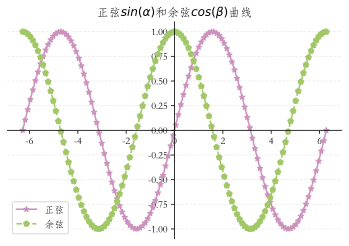

In [4]:
# 创建画布
plt.figure(figsize = (6,4),dpi = 120)
# 创建坐标系
ax = plt.subplot(1,1,1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_position('center')
ax.spines['left'].set_position('center')
# 绘图 - 定制线条样式及颜色
plt.plot(x, y1, color = np.random.rand(3),marker = '*',linestyle = '-',label = '正弦')
plt.plot(x, y2, color = np.random.rand(3),marker = 'p',linestyle = '--',label = '余弦')
# 图表标题
plt.title(r'正弦$sin(\alpha)$和余弦$cos(\beta)$曲线')
# 图表图例 默认在最佳位置（best）可更改
# best、upper right、upper left、lower left、lower right、right、center left、center right、lower center、upper center、center
plt.legend(loc = 'best')
# 定制网格线
plt.grid(axis = 'y',alpha = 0.25,linestyle = '--')
plt.show()

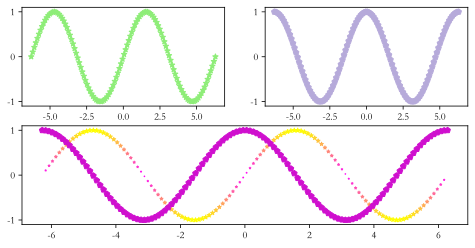

In [5]:
# 创建画布
plt.figure(figsize = (8,4),dpi = 120)
# 创建多个坐标系
plt.subplot(2,2,1)  # 第1行1列 第1个位置
plt.plot(x, y1, color = np.random.rand(3),marker = '*',linestyle = '-',label = '正弦')
plt.subplot(2,2,2)  # 第1行2列 第2个位置
plt.plot(x, y2, color = np.random.rand(3),marker = 'p',linestyle = '--',label = '余弦')
plt.subplot(2,1,2)  # 第2行1列 第2个位置  占据整行
# 绘制散点图，不能定制linestyle但可以根据值的大小设置阶梯色(C参数，cmap指定阶梯色颜色)以及点大小（S参数）
plt.scatter(x, y1, c = np.abs(y1 * 20),cmap = 'spring',marker = '*',s = np.abs(y1*20),label = '正弦')
plt.plot(x, y2, color = np.random.rand(3),marker = 'p',linestyle = '-.',label = '余弦')
plt.show()

In [6]:
# 安装gif插件
# !pip install gif

In [7]:
import gif
import IPython.display as disp

# 绘制动图
@gif.frame
def draw(xi):
    plt.subplots(1, figsize=(10, 4), dpi=120)
    plt.plot(xi, np.sin(xi), marker='x', color='r', linestyle='--')
    plt.xlim([-7, 7])
    plt.xticks(np.arange(-2 * np.pi, 2 * np.pi + 1, 0.5 * np.pi))
    plt.ylim([-1, 1])


frames = []
x = np.linspace(-2 * np.pi, 2 * np.pi, 120)
for i in range(x.size // 4):
    frame = draw(x[:(i + 1) * 4])
    frames.append(frame)
gif.save(frames, '../files/result/a.gif', duration=0.2, unit='s')
disp.HTML('<img src="a.gif">')

#### 饼图

[155 483 166 234 476 272 361]


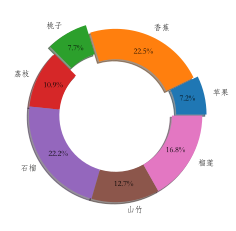

In [8]:
# 饼图
plt.figure(figsize=(6, 4), dpi=120)
data = np.random.randint(100, 500, 7)
print(data)
labels = ['苹果', '香蕉', '桃子', '荔枝', '石榴', '山竹', '榴莲']
plt.pie(
    # 数据
    data,
    # 自动显示百分比
    autopct='%.1f%%',
    # 饼图的半径
    radius=1,
    # 百分比文字到圆心的距离
    pctdistance=0.8,
    # 分离距离
    explode=[0.05, 0, 0.1, 0, 0, 0, 0],
    # 显示阴影
    shadow=True,
    # 字体属性
    textprops=dict(fontsize=8, color='k'),
    # 楔子属性
    wedgeprops=dict(linewidth=1, width=0.35),
    # 标签
    labels=labels
)
# plt.legend(loc = 'upper right')
plt.show()

#### 柱状图

[44 49 38 27]
[49 47 18 35]


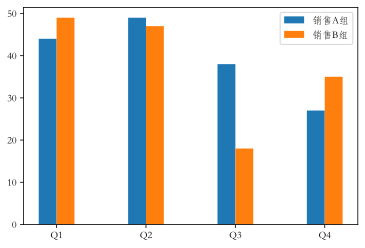

In [9]:
# 柱状图
labels = np.arange(4)
group1 = np.random.randint(20, 50, 4)
print(group1)
group2 = np.random.randint(10, 60, 4)
print(group2)
# group后面的参数是柱子的宽度。总宽为1，设置为0.5则铺满。默认居中。
# 为避免重叠，令第一个柱子显示位置向前一半第二个珠子向后一半
plt.bar(labels - 0.1, group1, 0.2, label='销售A组')
plt.bar(labels + 0.1, group2, 0.2, label='销售B组')
# labels运算时还是0-3，而显示为列表（Q1、Q2、...）
plt.xticks(np.arange(4), labels=['Q1', 'Q2', 'Q3', 'Q4'])
plt.legend()
plt.show()

[44 39 44 24]
[35 34 15 11]
[34 34 33 38]


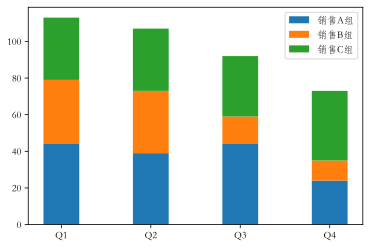

In [10]:
# 堆叠柱状图
labels = ['Q1', 'Q2', 'Q3', 'Q4']
group1 = np.random.randint(20, 50, 4)
print(group1)
group2 = np.random.randint(10, 60, 4)
print(group2)
group3 = np.random.randint(30, 40, 4)
print(group3)
plt.bar(labels, group1, 0.4, label='销售A组')
# 通过bottom属性设置数据堆叠
# bottom = group1 - group2的底部为group1
plt.bar(labels, group2, 0.4, bottom=group1, label='销售B组')
plt.bar(labels, group3, 0.4, bottom=group1 + group2, label='销售C组')
plt.legend()
plt.show()

#### 面积图

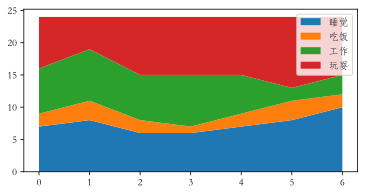

In [11]:
# 面积图
plt.figure(figsize=(6, 3))
days = np.arange(7)
sleeping = [7, 8, 6, 6, 7, 8, 10]
eating = [2, 3, 2, 1, 2, 3, 2]
working = [7, 8, 7, 8, 6, 2, 3]
playing = [8, 5, 9, 9, 9, 11, 9]
plt.stackplot(days, sleeping, eating, working, playing)
plt.legend(['睡觉', '吃饭', '工作', '玩耍'], fontsize=10)
plt.show()

#### 雷达图 - 映射在极坐标的折线图

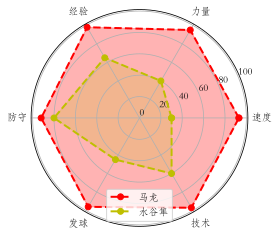

In [12]:
# 雷达图（极坐标折线图）
labels = np.array(['速度', '力量', '经验', '防守', '发球', '技术'])
malong_values = np.array([93, 95, 98, 92, 96, 97])
shuigu_values = np.array([30, 40, 65, 80, 45, 60])
angles = np.linspace(0, 2 * np.pi, labels.size, endpoint=False)
# 加一条数据让图形闭合
malong_values = np.concatenate((malong_values, [malong_values[0]]))
shuigu_values = np.concatenate((shuigu_values, [shuigu_values[0]]))
angles = np.concatenate((angles, [angles[0]]))
plt.figure(figsize=(4, 4), dpi=120)
ax = plt.subplot(projection='polar')
# 绘图和填充
plt.plot(angles, malong_values, color='r', marker='o', linestyle='--', linewidth=2)
plt.fill(angles, malong_values, color='r', alpha=0.3)
plt.plot(angles, shuigu_values, color='y', marker='o', linestyle='--', linewidth=2)
plt.fill(angles, shuigu_values, color='y', alpha=0.2)
# 设置文字标签
ax.set_thetagrids(angles[:-1] * 180 / np.pi, labels, fontsize=10)
# 设置网格线
ax.set_rgrids([0, 20, 40, 60, 80, 100], fontsize=10)
ax.legend(['马龙', '水谷隼'])
plt.show()

#### 玫瑰图 - 映射在极坐标的柱状图

[44 39 44 24 35 34 15 11]


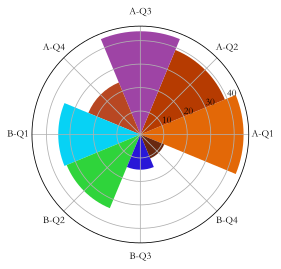

In [13]:
# 玫瑰图（圆形柱状图）
x = np.array([f'A-Q{i}' for i in range(1, 5)] + [f'B-Q{i}' for i in range(1, 5)])
y = np.array(group1.tolist() + group2.tolist())
print(y)
theta = np.linspace(0, 2 * np.pi, x.size, endpoint=False)
width = 2 * np.pi / x.size
colors = np.random.rand(8, 3)
# 将柱状图投影到极坐标，将坐标系映射到极坐标
ax = plt.subplot(projection='polar')
plt.bar(theta, y, width=width, color=colors, bottom=0)
ax.set_thetagrids(theta * 180 / np.pi, x, fontsize=10)
plt.show()

#### 3D 柱状图

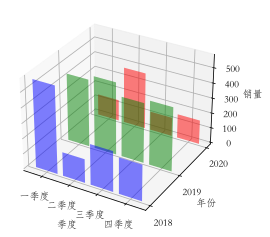

In [14]:
# 3D柱状图
# 将整个平面(X,Z)放在一个坐标轴(Y)上
plt.figure(figsize=(8, 4), dpi=120)
# 将坐标系映射到3d
ax = plt.subplot(projection='3d')

colors = ['r', 'g', 'b']
yticks = range(2020, 2017, -1)
for idx, y in enumerate(yticks):
    x_data = [f'{x}季度' for x in '一二三四']
    z_data = np.random.randint(100, 600, 4)
    ax.bar(x_data, z_data, zs=y, zdir='y', color=colors[idx], alpha=0.5)
ax.set_xlabel('季度')
ax.set_ylabel('年份')
ax.set_zlabel('销量')
ax.set_yticks(yticks)
plt.show()

#### 箱线图

count     53.000000
mean      58.037736
std       38.522702
min       10.000000
25%       29.000000
50%       53.000000
75%       74.000000
max      185.000000
dtype: float64


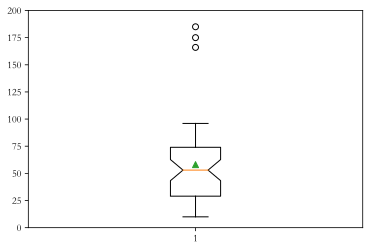

In [31]:
# 箱线图
data = np.random.randint(10, 100, 50)
data = np.append(data, 185)
data = np.append(data, 175)
data = np.append(data, 166)
print(pd.Series(data).describe())
plt.boxplot(data, whis=1.5, showmeans=True, notch=True)
plt.ylim([0, 200])
plt.show()

In [16]:
!pip install jieba

Looking in indexes: https://pypi.doubanio.com/simple


In [17]:
import jieba
import re

# 读取文件
with open('../files/data/test.txt',encoding = 'utf-8') as file:
    content = file.read()
# 用空格替换换行符
content = re.sub(r'\s','',content)
# 用jieba分词
words = jieba.lcut(content)
len(words)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\zs\AppData\Local\Temp\jieba.cache
Loading model cost 0.537 seconds.
Prefix dict has been built successfully.


3340

In [18]:
# 获取停词文件
def get_stopwords(file):
    with open(file, 'r',encoding = 'utf-8') as file:
        stopword_list = [word.strip('\n') for word in file.readlines()]
    return stopword_list


stop_words1 = get_stopwords('../files/data/哈工大停用词表.txt')
stop_words2 = get_stopwords('../files/data/中文停用词库.txt')
# 将两个停词文件合并为集合 - 集合查找元素效率更高
stop_words = set(stop_words1 + stop_words2)
stop_words

{'"',
 '#',
 '$',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '-- ',
 '. ',
 '...',
 '......',
 '...................',
 './',
 '.一',
 '.数',
 '.日 ',
 '/',
 '//',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 '://',
 '::',
 ';',
 '<',
 '=',
 '>',
 '?',
 '? ',
 '@',
 'Lex ',
 '[',
 ']',
 '_',
 'exp ',
 'sub',
 'sup',
 '}',
 '~~~~',
 '·',
 '×',
 '× ',
 '××× ',
 'Δ',
 'Ψ',
 'γ',
 'μ',
 'φ',
 'φ．',
 'В',
 '—',
 '——',
 '———',
 '‘',
 '’',
 '’‘ ',
 '“',
 '”',
 '”，',
 '……',
 '…………………………………………………③',
 '′∈',
 '′｜',
 '℃ ',
 'Ⅲ',
 '↑',
 '→',
 '∈［ ',
 '∪φ∈',
 '≈ ',
 '①',
 '②',
 '②ｃ',
 '③',
 '③］',
 '④',
 '⑤',
 '⑥',
 '⑦',
 '⑧',
 '⑨',
 '⑩',
 '──',
 '■',
 '▲',
 '、',
 '。',
 '〉',
 '《',
 '》',
 '》），',
 '」',
 '『',
 '』',
 '【',
 '】',
 '〔',
 '〕',
 '〕〔',
 '㈧ ',
 '一',
 '一.',
 '一一',
 '一个',
 '一些',
 '一何',
 '一切',
 '一则',
 '一方面',
 '一旦',
 '一来',
 '一样',
 '一番',
 '一直',
 '一般',
 '一转眼',
 '万一',
 '上',
 '上下',
 '下',
 '不',
 '不仅',
 '不但',
 '不光',
 '不单',
 '不只',
 '不外乎',
 '不如',
 '不妨',
 '不尽',
 '不尽然',
 '不得',
 '不怕',


In [19]:
# 从分词的结果中去掉没有实际意义的停词
words = [word for word in words if word not in stop_words]
print(len(words))

2378


In [20]:
# 安装wordCloud
# !pip install wordcloud

In [21]:
from wordcloud import WordCloud
from PIL import Image

txt = ' '.join(words)
mask = np.array(Image.open('../files/data/china.jpg'))
wc = WordCloud(font_path='E:\HTML\第二十七组 宗志雄 201808240838\第二十七组 宗志雄 201808240838\字体\字魂39号-肥宅快乐体.ttf',
              width = 1200,
              height = 800,
              mask = mask,
              max_words=100,
              background_color='white')
wc.generate(txt)
wc.to_file('../files/result/WordCloud.png')

### Seaborn

对Matplotlib做了封装，用默认的配置减少绘图参数

In [22]:
# 安装seaborn
# !pip install seaborn

In [23]:
import seaborn as sns

# 获取小费数据
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


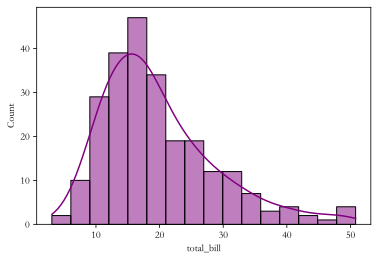

In [24]:
# 绘制柱状图，kde = True --> 核密度估计 (一个参数就帮你解决了)
sns.histplot(tips['total_bill'], bins=16, color="purple", kde=True)
plt.show()

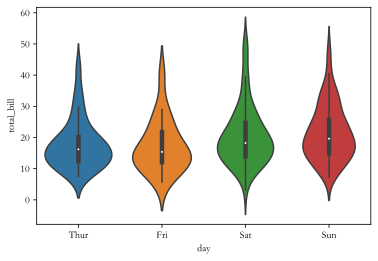

In [25]:
# 箱线图
sns.violinplot(x='day', y='total_bill', data=tips)
plt.show()

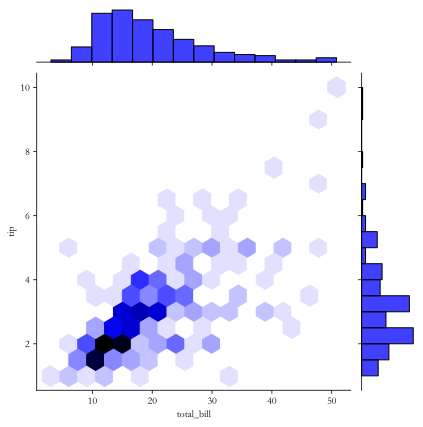

In [26]:
sns.jointplot(x='total_bill', y='tip', data=tips, color='blue', kind='hex')
plt.show()